#### <center> CCT COLLEGE DUBLIN <center>
#### <center> Higher Diploma in Science in Data Analytics for Business <center>
#### <center> BOARD GAMES ANALYSIS <center>
#### <center> Eduarda Schein <center>

#### 1. Introduction

<p style='text-align: justify;'> 
Reports from excavations in the Egypt that happened around 1992 indicate that the first board games date back from 3,000 B.C. Archaeologists found four of them as well as paintings on the wall of people playing them (DONAVAN, 2019). At the time, the games became popular within the Royals and later were associated to religion and education (ATTIA, 2018). 
<p style='text-align: justify;'> 
Nowadays several studies reveal the benefits of playing board games on health and education. Ramani and Siegler (2008) affirm that after playing number board games for a specific time increased the proficiency on numerical tasks of young pre-schoolers and Nakao (2019) informs that they can promote healthy eating as well as improve cognitive impairment and depression. 
<p style='text-align: justify;'> 
This project is an analysis of several board games that were rated and listed with their own categories, family, mechanics, amount of players and playing time, etc. The goal is to get statistical insights about the data, providing a final report that would fit in a scenario where a company that wants to publish a new board game would like to know which characteristic would make this game have a high average rating. Considering that the stakeholders are young adults, the report will be designed with visualizations that lead quick to the answer and are colour-blind friendly. 
<p style='text-align: justify;'> 
It is estimated that 8% of men and 0.5% of women in the world are colour-blind (Ferreira, 2020) so it is important to avoid combinations such as red and green, green and brown, blue and purple, etc (Cravit, 2019). For this reason, charts will be presented as monochromatic by changing the colour set in each chartto  maintain the attention of the public, unless it is ranking or different categories analysis, in which different shades of one colour will be used. In some cases, the size of the axis is changed in order to provide a better visualization between the observations.
<p style='text-align: justify;'> 
The analysis will be carried out via Python with technologies from pandas, numpy, matplotlib, seaborn, gensim, sklearn and plotly libraries. </p>


#### 2. Understanding the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/board_games.csv')
df.head()

game_id                                        description  \
0        1  Die Macher is a game about seven sequential po...   
1        2  Dragonmaster is a trick-taking card game based...   
2        3  Part of the Knizia tile-laying trilogy, Samura...   
3        4  When you see the triangular box and the luxuri...   
4        5  In Acquire, each player strategically invests ...   

                                          image  max_players  max_playtime  \
0   //cf.geekdo-images.com/images/pic159509.jpg            5           240   
1   //cf.geekdo-images.com/images/pic184174.jpg            4            30   
2  //cf.geekdo-images.com/images/pic3211873.jpg            4            60   
3   //cf.geekdo-images.com/images/pic285299.jpg            4            60   
4   //cf.geekdo-images.com/images/pic342163.jpg            6            90   

   min_age  min_players  min_playtime            name  playing_time  ...  \
0       14            3           240      Die Macher           240  ...   
1       12            3            30    Dragonmaster            30  ...   
2       10            2            30         Samurai            60  ...   
3       12            2            60  Tal der Könige            60  ...   
4       12            3            90         Acquire            90  ...   

                        artist                        category compilation  \
0          Marcus Gschwendtner  Economic,Negotiation,Political         NaN   
1                   Bob Pepper               Card Game,Fantasy         NaN   
2              Franz Vohwinkel      Abstract Strategy,Medieval         NaN   
3                          NaN                         Ancient         NaN   
4  Scott Okumura,Peter Whitley                        Economic         NaN   

                designer expansion  \
0     Karl-Heinz Schmiel       NaN   
1  G. W. "Jerry" D'Arcey       NaN   
2          Reiner Knizia       NaN   
3      Christian Beierer       NaN   
4            Sid Sackson       NaN   

                                              family  \
0         Country: Germany,Valley Games Classic Line   
1                                   Animals: Dragons   
2  Asian Theme,Country: Japan,Knizia tile-laying ...   
3             Country: Egypt,Promotional Board Games   
4                                3M Bookshelf Series   

                                            mechanic  \
0  Area Control / Area Influence,Auction/Bidding,...   
1                                       Trick-taking   
2  Area Control / Area Influence,Hand Management,...   
3  Action Point Allowance System,Area Control / A...   
4       Hand Management,Stock Holding,Tile Placement   

                                           publisher average_rating  \
0  Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...        7.66508   
1                           E.S. Lowe,Milton Bradley        6.60815   
2  999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...        7.44119   
3                                             KOSMOS        6.60675   
4  3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...        7.35830   

  users_rated  
0        4498  
1         478  
2       12019  
3         314  
4       15195  

[5 rows x 22 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

<p style='text-align: justify;'>
The above table presents that there are missing values in 45% of the columns which some of them sum up more than 70% of missing data, such as “compilation” and “expansion”. Columns with missing values over 60% will be disregarded and for the remaining ones, rows with missing data will be dropped as all of them are categorical features, this means that even if we use imputation method with “mode”, which would be the one for categories, it will create uncertain data.

Data dictionary is presented by the image below:

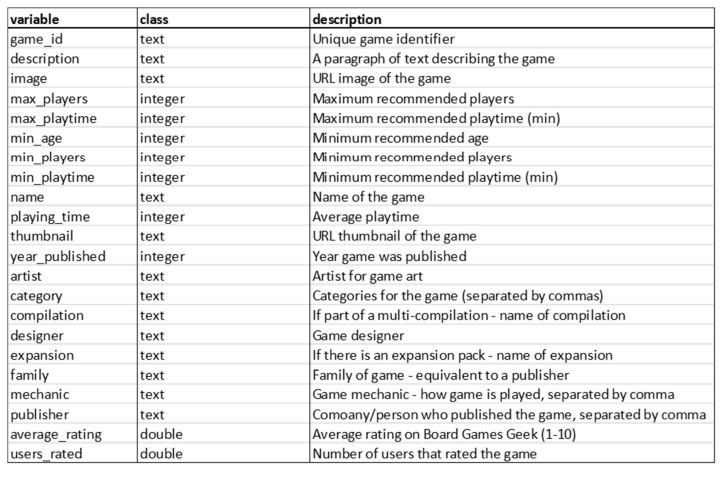

In [4]:
#dropping columns that have more than 60% of missing values (compilation and expansion):
#dropping columns that do not have important data:
df.drop(columns=['description', 'image', 'compilation', 'expansion', 'thumbnail'], inplace=True)
df.head()

game_id  max_players  max_playtime  min_age  min_players  min_playtime  \
0        1            5           240       14            3           240   
1        2            4            30       12            3            30   
2        3            4            60       10            2            30   
3        4            4            60       12            2            60   
4        5            6            90       12            3            90   

             name  playing_time  year_published                       artist  \
0      Die Macher           240            1986          Marcus Gschwendtner   
1    Dragonmaster            30            1981                   Bob Pepper   
2         Samurai            60            1998              Franz Vohwinkel   
3  Tal der Könige            60            1992                          NaN   
4         Acquire            90            1964  Scott Okumura,Peter Whitley   

                         category               designer  \
0  Economic,Negotiation,Political     Karl-Heinz Schmiel   
1               Card Game,Fantasy  G. W. "Jerry" D'Arcey   
2      Abstract Strategy,Medieval          Reiner Knizia   
3                         Ancient      Christian Beierer   
4                        Economic            Sid Sackson   

                                              family  \
0         Country: Germany,Valley Games Classic Line   
1                                   Animals: Dragons   
2  Asian Theme,Country: Japan,Knizia tile-laying ...   
3             Country: Egypt,Promotional Board Games   
4                                3M Bookshelf Series   

                                            mechanic  \
0  Area Control / Area Influence,Auction/Bidding,...   
1                                       Trick-taking   
2  Area Control / Area Influence,Hand Management,...   
3  Action Point Allowance System,Area Control / A...   
4       Hand Management,Stock Holding,Tile Placement   

                                           publisher  average_rating  \
0  Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...         7.66508   
1                           E.S. Lowe,Milton Bradley         6.60815   
2  999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...         7.44119   
3                                             KOSMOS         6.60675   
4  3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...         7.35830   

   users_rated  
0         4498  
1          478  
2        12019  
3          314  
4        15195

In [5]:
#dealing with missing values:
df.dropna(axis = 0, how= 'any', inplace= True)
df.shape

(5396, 17)

In [6]:
df.describe()

game_id  max_players  max_playtime      min_age  min_players  \
count    5396.000000  5396.000000   5396.000000  5396.000000  5396.000000   
mean    69561.657895     4.792439     96.960341    10.066901     2.010378   
std     66389.573051     5.697918    323.721740     3.294584     0.665225   
min         1.000000     0.000000      0.000000     0.000000     0.000000   
25%      7395.500000     3.000000     30.000000     8.000000     2.000000   
50%     39348.000000     4.000000     60.000000    10.000000     2.000000   
75%    135648.250000     6.000000     90.000000    12.000000     2.000000   
max    216725.000000    99.000000  17280.000000    21.000000     9.000000   

       min_playtime  playing_time  year_published  average_rating  \
count   5396.000000   5396.000000     5396.000000     5396.000000   
mean      84.015938     96.960341     2004.760007        6.630319   
std      286.274619    323.721740       11.414543        0.765052   
min        0.000000      0.000000     1951.000000        2.339400   
25%       30.000000     30.000000     2001.000000        6.125865   
50%       45.000000     60.000000     2009.000000        6.644575   
75%       90.000000     90.000000     2013.000000        7.144388   
max    17280.000000  17280.000000     2016.000000        9.003920   

        users_rated  
count   5396.000000  
mean    1371.019644  
std     3863.521018  
min       50.000000  
25%      109.000000  
50%      271.000000  
75%      954.000000  
max    67655.000000

<p style='text-align: justify;'>
The descriptive statistics of the numerical data reveal that the mean playing time is around 1h36min, where usually the games need a minimum of 2 players, in average, and a maximum of 5, in average as well. The average rating of the games is 6.63 where at least 50 users rated each game. The standard deviation of some features is very high, this means that probably there are outliers on this data and this will be further verified. 

<p style='text-align: justify;'>
When observations of features such as minimum and maximum players or playtime are zero, means that they are also missing values. Back to this subject, these observations will be treated with imputation by the mean value of each column, as it almost does not affect the description of the features.

In [7]:
## REVIEW

users_zero = df[df['users_rated']==0]
min_players_zero = df[df['min_players'] == 0]
max_players_zero = df[df['max_players'] == 0]
min_time_zero = df[df['min_playtime'] == 0]
max_time_zero = df[df['max_playtime'] == 0]

print(users_zero.shape)
print(min_players_zero.shape)
print(max_players_zero.shape)
print(min_time_zero.shape)
print(max_time_zero.shape)

(0, 17)
(9, 17)
(19, 17)
(94, 17)
(107, 17)


In [8]:
## REVIEW
#these observations will be replaced by the mean of each feature:

df['min_players']=df['min_players'].replace(0,df['min_players'].mean())
df['max_players']=df['max_players'].replace(0,df['max_players'].mean())
df['max_playtime']=df['max_playtime'].replace(0,df['max_playtime'].mean())
df['min_playtime']=df['min_playtime'].replace(0,df['min_playtime'].mean())

df.describe()

game_id  max_players  max_playtime      min_age  min_players  \
count    5396.000000  5396.000000   5396.000000  5396.000000  5396.000000   
mean    69561.657895     4.809314     98.883016    10.066901     2.013731   
std     66389.573051     5.690791    323.427905     3.294584     0.660129   
min         1.000000     1.000000      1.000000     0.000000     1.000000   
25%      7395.500000     3.000000     30.000000     8.000000     2.000000   
50%     39348.000000     4.000000     60.000000    10.000000     2.000000   
75%    135648.250000     6.000000     96.960341    12.000000     2.000000   
max    216725.000000    99.000000  17280.000000    21.000000     9.000000   

       min_playtime  playing_time  year_published  average_rating  \
count   5396.000000   5396.000000     5396.000000     5396.000000   
mean      85.479522     96.960341     2004.760007        6.630319   
std      286.055987    323.721740       11.414543        0.765052   
min        1.000000      0.000000     1951.000000        2.339400   
25%       30.000000     30.000000     2001.000000        6.125865   
50%       45.000000     60.000000     2009.000000        6.644575   
75%       90.000000     90.000000     2013.000000        7.144388   
max    17280.000000  17280.000000     2016.000000        9.003920   

        users_rated  
count   5396.000000  
mean    1371.019644  
std     3863.521018  
min       50.000000  
25%      109.000000  
50%      271.000000  
75%      954.000000  
max    67655.000000

In [9]:
df.describe(include=object)

name           artist              category  \
count               5396             5396                  5396   
unique              5351             3403                  2348   
top     Cosmic Encounter  Franz Vohwinkel  Wargame,World War II   
freq                   4               95                   294   

             designer                     family         mechanic  publisher  
count            5396                       5396             5396       5396  
unique           2730                       2957             2282       3112  
top     Reiner Knizia  Crowdfunding: Kickstarter  Hex-and-Counter  GMT Games  
freq              136                        343              329        148

<p style='text-align: justify;'>
Additionally, the descriptive statistics of the strings present that Robin Hood is the game with highest frequency, whereas Wargame, World War II is the most common category, Hex-and-Counter the most common mechanic and Crowfunding: Kickstarter the most common family. But why Robin Hood appears in 5 observations? Are there any duplicated rows? Or different versions of this game?

In [10]:
#checking duplicated rows:

dup = df[df.duplicated()]
print("Number of duplicated rows:", dup.shape)

Number of duplicated rows: (0, 17)


In [11]:
df.loc[df['name']=='Robin Hood']

game_id  max_players  max_playtime  min_age  min_players  min_playtime  \
1253     1947          6.0          60.0       12          2.0          60.0   
2005     3569          6.0          60.0        8          2.0          60.0   
7439   104640          5.0          50.0       14          3.0          50.0   

            name  playing_time  year_published  \
1253  Robin Hood            60            1991   
2005  Robin Hood            60            1990   
7439  Robin Hood            50            2011   

                               artist                            category  \
1253                     Frank Gerwin                  Adventure,Medieval   
2005  Ginette Hoffmann,Max J. Kobbert                    Adventure,Racing   
7439            Renato Silva Sasdelli  Bluffing,Humor,Medieval,Party Game   

                       designer                  family  \
1253            Julian Musgrave  Characters: Robin Hood   
2005             Max J. Kobbert  Characters: Robin Hood   
7439  Sérgio Halaban,André Zatz  Characters: Robin Hood   

                                               mechanic  \
1253  Action Point Allowance System,Campaign / Battl...   
2005                     Memory,Point to Point Movement   
7439                       Hand Management,Role Playing   

                                             publisher  average_rating  \
1253                 Laurin Verlag,Prince August Games         5.45490   
2005  Otto Maier Verlag,Ravensburger Spieleverlag GmbH         5.60167   
7439                                   Galápagos Jogos         7.15591   

      users_rated  
1253           51  
2005           60  
7439          181

<p style='text-align: justify;'>
The rows above show that there are no duplicated data on the entire dataset. So in order to answer the question above, the game has been filtered and it was possible to verify that at least 4 different artists created games with different mechanic and categories but are all named the same. The average rating of all of them is lower than 6, except for the one designed by the Brazilian Renato Silva Sasdelli.
<p style='text-align: justify;'>
As previously noticed, the standard deviation of some of the features is high. For this reason, the numeric features will be plotted with seaborn boxplot in order to verify their distribution and if there are outliers (HARRISON, 2019). 


In [12]:
#checking distribution of numerical data:
fig = make_subplots(rows=3, cols=3, subplot_titles=['max_players', 'max_playtime', 'min_age', 'min_players', 'min_playtime', 'playing_time', 'year_published', 'average_rating', 'users_rated'])

fig.add_trace(go.Box(y=df['max_players']), 1, 1)
fig.add_trace(go.Box(y=df['max_playtime']), 1, 2)
fig.add_trace(go.Box(y=df['min_age']), 1, 3)
fig.add_trace(go.Box(y=df['min_players']), 2, 1)
fig.add_trace(go.Box(y=df['min_playtime']), 2, 2)
fig.add_trace(go.Box(y=df['playing_time']), 2, 3)
fig.add_trace(go.Box(y=df['year_published']), 3, 1)
fig.add_trace(go.Box(y=df['average_rating']), 3, 2)
fig.add_trace(go.Box(y=df['users_rated']), 3, 3)

fig.update_layout({'title': {'text':'Distribution of Numerical Variables', 'x':0.5, 'font_size':20,
                            }},
                 showlegend = False, autosize=False, width=900, height=600,
                  paper_bgcolor='ghostwhite')

fig.update_yaxes(showgrid = True, color='grey')
fig.update_annotations(font_size = 14)
fig.show()

<p style='text-align: justify;'>
Maximum and minimum playtime, playing time and users rated are the features that contain outliers, as there are observations outside of the interquartile range. However, when deleting it, the data is reduced to almost half of its new shape. This means that, considering the original data, around 7,000 observations would be disregarded after dealing with missing values and outliers. For this reason, outliers will be maintained. 
<p style='text-align: justify;'>
Categorical variables will be encoded by using Label Encoder from Sci-kit Learn library in order to further analyse it. This encoding method was chosen because it does not imply raking between categories and does not create sparse data as it assigns a value to each unique category (HARRISON, 2019). It only works in one column at a time, for this reason a loop will be used to run over the features needed. 

In [13]:
#Encoding categorical variables with Label Encoder:

from sklearn.preprocessing import LabelEncoder

all_labelencoders = {}

cols = ['artist', 'category', 'designer', 'mechanic', 'family', 'publisher'] # strings with names

for name in cols:
    labelencoder = LabelEncoder()
    all_labelencoders[name] = labelencoder

    labelencoder.fit( df[name] )
    df['labelencoder_' + name] = labelencoder.transform( df[name] )


print(all_labelencoders['artist'])
print(all_labelencoders['designer'])
print(all_labelencoders['mechanic'])
print(all_labelencoders['family'])
print(all_labelencoders['publisher'])

#for name in cols:
#    print(name, all_labelencoders[name])

df.head()

LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()


game_id  max_players  max_playtime  min_age  min_players  min_playtime  \
0        1          5.0         240.0       14          3.0         240.0   
1        2          4.0          30.0       12          3.0          30.0   
2        3          4.0          60.0       10          2.0          30.0   
4        5          6.0          90.0       12          3.0          90.0   
5        6          6.0         240.0       12          2.0         240.0   

                 name  playing_time  year_published  \
0          Die Macher           240            1986   
1        Dragonmaster            30            1981   
2             Samurai            60            1998   
4             Acquire            90            1964   
5  Mare Mediterraneum           240            1989   

                        artist  ...  \
0          Marcus Gschwendtner  ...   
1                   Bob Pepper  ...   
2              Franz Vohwinkel  ...   
4  Scott Okumura,Peter Whitley  ...   
5                 Jean du Poël  ...   

                                            mechanic  \
0  Area Control / Area Influence,Auction/Bidding,...   
1                                       Trick-taking   
2  Area Control / Area Influence,Hand Management,...   
4       Hand Management,Stock Holding,Tile Placement   
5                                       Dice Rolling   

                                           publisher average_rating  \
0  Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...        7.66508   
1                           E.S. Lowe,Milton Bradley        6.60815   
2  999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...        7.44119   
4  3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...        7.35830   
5  Historien Spiele Galerie (Historien Spielegale...        6.52534   

  users_rated labelencoder_artist  labelencoder_category  \
0        4498                2071                   1861   
1         478                 381                   1241   
2       12019                1102                     84   
4       15195                2905                   1801   
5          73                1481                   1613   

   labelencoder_designer  labelencoder_mechanic  labelencoder_family  \
0                   1463                    510                 1751   
1                    913                   2276                  761   
2                   2126                    664                 1004   
4                   2369                   1962                   82   
5                   1210                   1557                 1470   

   labelencoder_publisher  
0                    2085  
1                    1527  
2                     225  
4                     190  
5                    2131  

[5 rows x 23 columns]

In [14]:
df['artist'].describe()

count                5396
unique               3403
top       Franz Vohwinkel
freq                   95
Name: artist, dtype: object

In [15]:
len(df['labelencoder_artist'].unique()) #here we can see that label encoder worked, as it has the same amount of unique values of Category

3403

In [16]:
#splitting column mechanic to 5 columns to get unique values, use ',' delimiter:

df2 = df['mechanic'].str.split(',', n=4, expand=True)
df2.columns = ['mechanic{}'.format(x+1) for x in df2.columns]

df2

mechanic1             mechanic2  \
0      Area Control / Area Influence       Auction/Bidding   
1                       Trick-taking                  None   
2      Area Control / Area Influence       Hand Management   
4                    Hand Management         Stock Holding   
5                       Dice Rolling                  None   
...                              ...                   ...   
10515              Co-operative Play                  None   
10516                  Card Drafting  Deck / Pool Building   
10524                   Dice Rolling         Grid Movement   
10527                Hex-and-Counter                  None   
10531                  Card Drafting       Hand Management   

                    mechanic3        mechanic4                      mechanic5  
0                Dice Rolling  Hand Management  Simultaneous Action Selection  
1                        None             None                           None  
2              Set Collection   Tile Placement                           None  
4              Tile Placement             None                           None  
5                        None             None                           None  
...                       ...              ...                            ...  
10515                    None             None                           None  
10516         Hand Management             None                           None  
10524  Variable Player Powers             None                           None  
10527                    None             None                           None  
10531                    None             None                           None  

[5396 rows x 5 columns]

In [17]:
#splitting column category to 4 columns to get unique values, use ',' delimiter:

df3 = df['category'].str.split(',', n=5, expand=True)
df3.columns = ['category{}'.format(x+1) for x in df3.columns]

df3

category1      category2   category3 category4 category5  \
0               Economic    Negotiation   Political      None      None   
1              Card Game        Fantasy        None      None      None   
2      Abstract Strategy       Medieval        None      None      None   
4               Economic           None        None      None      None   
5           Civilization       Nautical        None      None      None   
...                  ...            ...         ...       ...       ...   
10515          Card Game           None        None      None      None   
10516          Card Game       Medieval        None      None      None   
10524            Fantasy       Fighting  Miniatures    Sports      None   
10527        Vietnam War        Wargame        None      None      None   
10531          Card Game  City Building        None      None      None   

      category6  
0          None  
1          None  
2          None  
4          None  
5          None  
...         ...  
10515      None  
10516      None  
10524      None  
10527      None  
10531      None  

[5396 rows x 6 columns]

In [18]:
df3['category1'].unique()

array(['Economic', 'Card Game', 'Abstract Strategy', 'Civilization',
       'Exploration', 'Fantasy', 'Ancient', 'Negotiation', 'Bluffing',
       'Collectible Components', 'Miniatures', 'Science Fiction',
       'Adventure', 'Fighting', 'Renaissance', 'City Building',
       'Political', 'Medieval', 'Wargame', 'American Civil War',
       'Animals', 'Prehistoric', 'Nautical', 'Electronic',
       'Action / Dexterity', 'Racing', 'Trains', 'Civil War',
       'Age of Reason', 'Napoleonic', 'Humor', 'American West',
       "Children's Game", 'Comic Book / Strip', 'Aviation / Flight',
       'Arabian', 'Novel-based', 'Party Game', 'Deduction', 'Pirates',
       'Horror', 'Dice', 'Post-Napoleonic', 'Transportation', 'Sports',
       'Movies / TV / Radio theme', 'Farming', 'Book',
       'American Indian Wars', 'Print & Play', 'Modern Warfare',
       'Territory Building', 'Pike and Shot', 'Murder/Mystery', 'Mafia',
       'Korean War', 'Word Game', 'Educational', 'Memory', 'Vietnam War',
 

It is verified that the encoder worked well as it returned the same amount of unique values for the Category feature. 	

With the data encoded is now possible to check the distribution of the features, which are plotted below on density plots. 

In [19]:
mech_cat = pd.merge(df2, df3, left_index=True, right_index=True)
mech_cat

mechanic1             mechanic2  \
0      Area Control / Area Influence       Auction/Bidding   
1                       Trick-taking                  None   
2      Area Control / Area Influence       Hand Management   
4                    Hand Management         Stock Holding   
5                       Dice Rolling                  None   
...                              ...                   ...   
10515              Co-operative Play                  None   
10516                  Card Drafting  Deck / Pool Building   
10524                   Dice Rolling         Grid Movement   
10527                Hex-and-Counter                  None   
10531                  Card Drafting       Hand Management   

                    mechanic3        mechanic4                      mechanic5  \
0                Dice Rolling  Hand Management  Simultaneous Action Selection   
1                        None             None                           None   
2              Set Collection   Tile Placement                           None   
4              Tile Placement             None                           None   
5                        None             None                           None   
...                       ...              ...                            ...   
10515                    None             None                           None   
10516         Hand Management             None                           None   
10524  Variable Player Powers             None                           None   
10527                    None             None                           None   
10531                    None             None                           None   

               category1      category2   category3 category4 category5  \
0               Economic    Negotiation   Political      None      None   
1              Card Game        Fantasy        None      None      None   
2      Abstract Strategy       Medieval        None      None      None   
4               Economic           None        None      None      None   
5           Civilization       Nautical        None      None      None   
...                  ...            ...         ...       ...       ...   
10515          Card Game           None        None      None      None   
10516          Card Game       Medieval        None      None      None   
10524            Fantasy       Fighting  Miniatures    Sports      None   
10527        Vietnam War        Wargame        None      None      None   
10531          Card Game  City Building        None      None      None   

      category6  
0          None  
1          None  
2          None  
4          None  
5          None  
...         ...  
10515      None  
10516      None  
10524      None  
10527      None  
10531      None  

[5396 rows x 11 columns]

In [20]:
games = pd.merge(df, mech_cat, left_index=True, right_index=True)
games

game_id  max_players  max_playtime  min_age  min_players  min_playtime  \
0            1          5.0         240.0       14          3.0         240.0   
1            2          4.0          30.0       12          3.0          30.0   
2            3          4.0          60.0       10          2.0          30.0   
4            5          6.0          90.0       12          3.0          90.0   
5            6          6.0         240.0       12          2.0         240.0   
...        ...          ...           ...      ...          ...           ...   
10515   209325          5.0          30.0        8          1.0          20.0   
10516   209418          4.0          30.0       14          2.0          30.0   
10524   212445          2.0         120.0       12          2.0          45.0   
10527   214996          2.0         480.0       12          1.0          30.0   
10531   216725          5.0          60.0       14          1.0          30.0   

                                                    name  playing_time  \
0                                             Die Macher           240   
1                                           Dragonmaster            30   
2                                                Samurai            60   
4                                                Acquire            90   
5                                     Mare Mediterraneum           240   
...                                                  ...           ...   
10515                                  The Game: Extreme            30   
10516                          Dominion (Second Edition)            30   
10524                          Blood Bowl (2016 edition)           120   
10527  Silver Bayonet: The First Team in Vietnam, 196...           480   
10531    Villages of Valeria: Deluxe Kickstarter Edition            60   

       year_published                                             artist  ...  \
0                1986                                Marcus Gschwendtner  ...   
1                1981                                         Bob Pepper  ...   
2                1998                                    Franz Vohwinkel  ...   
4                1964                        Scott Okumura,Peter Whitley  ...   
5                1989                                       Jean du Poël  ...   
...               ...                                                ...  ...   
10515            2016                                Oliver Freudenreich  ...   
10516            2016                                      Julien Delval  ...   
10524            2016  Wayne England,David Gallagher,Pete Knifton,Ric...  ...   
10527            2016                                     Charles Kibler  ...   
10531            2016                               Mihajlo Dimitrievski  ...   

                  mechanic2               mechanic3        mechanic4  \
0           Auction/Bidding            Dice Rolling  Hand Management   
1                      None                    None             None   
2           Hand Management          Set Collection   Tile Placement   
4             Stock Holding          Tile Placement             None   
5                      None                    None             None   
...                     ...                     ...              ...   
10515                  None                    None             None   
10516  Deck / Pool Building         Hand Management             None   
10524         Grid Movement  Variable Player Powers             None   
10527                  None                    None             None   
10531       Hand Management                    None             None   

                           mechanic5          category1      category2  \
0      Simultaneous Action Selection           Economic    Negotiation   
1                               None          Card Game        Fantasy   
2                               None  Abstract Strategy       Medieval   
4          

In [21]:
games.drop(columns=['mechanic3', 'mechanic4', 'mechanic5', 'category3', 'category4', 'category5', 'category6'], inplace=True)

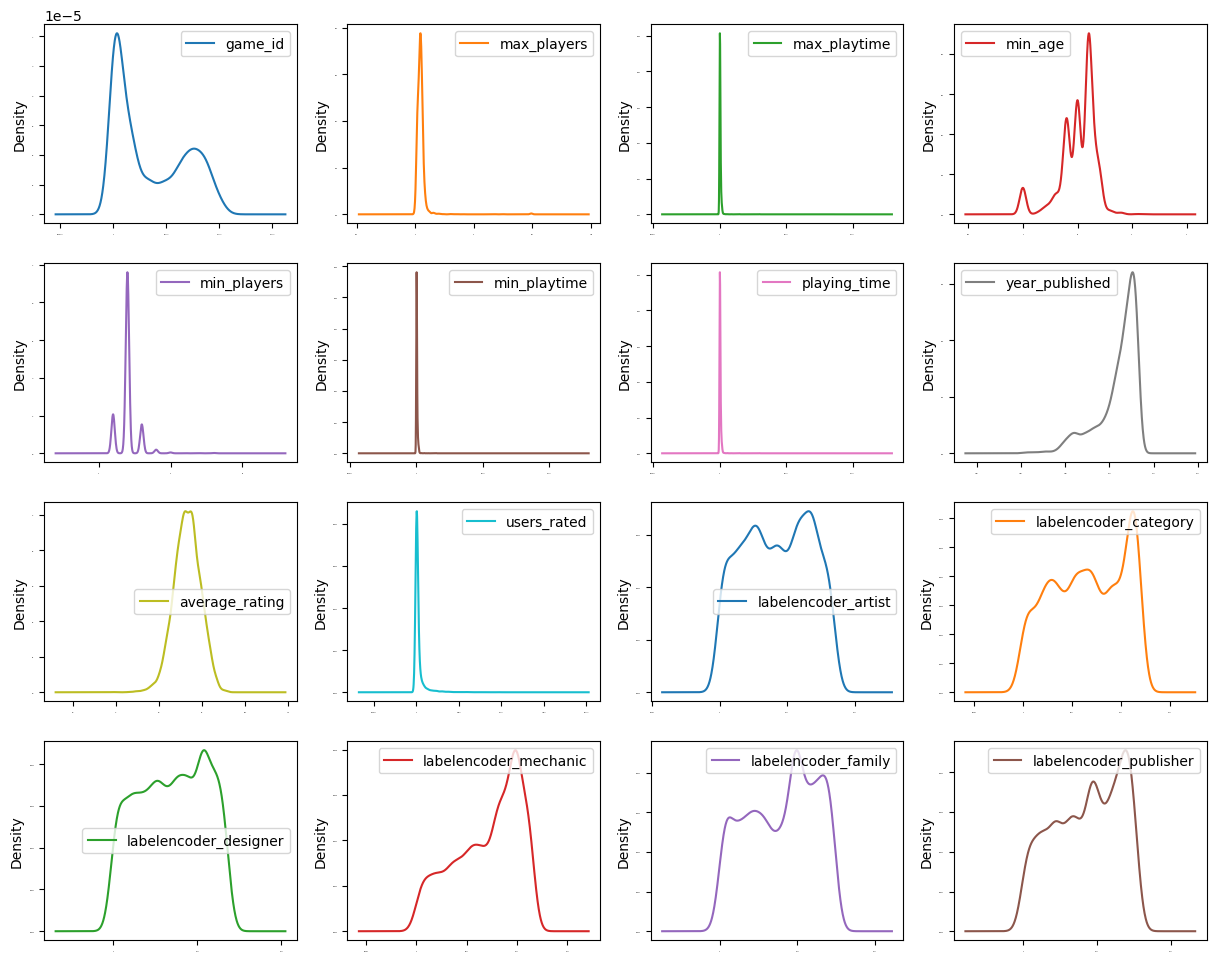

In [22]:
# density
games.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, grid=False, figsize=(15,15))
plt.show()

<p style='text-align: justify;'>
None of the distributions are normal, which means that the mean, median and mode of each feature are different, including the Category feature, which is highlighted below.

In [23]:
numericalCols = games.select_dtypes(exclude=['object'])

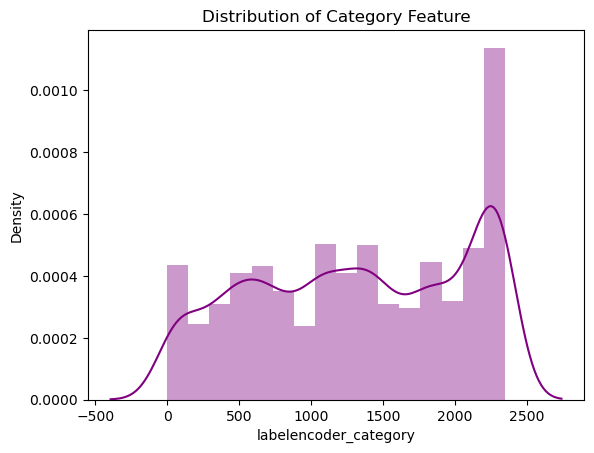

In [24]:
sns.distplot(numericalCols.labelencoder_category, hist=True, kde=True, color='purple').set(title='Distribution of Category Feature');

<p style='text-align: justify;'>
It is possible to extract good statistical insights from this dataset, such as the most common category or the games with the best average rating. 
<p style='text-align: justify;'>
The bar chart below presents the ranking of the 5 best rated games on this dataset. To achieve this result, the data was grouped by name of the games and then the mean of their average rating was calculated, as they may appear in more than one row. The values were sorted on descending order and “head()” used to select the first 5. Here, different shades of a hue are used as they imply ranking idea, where the darkest show the highest position.


In [25]:
#mean of each game, grouping all the observations by 'name' and calculating the 'mean' of the column 'average_rating':
top5 = pd.DataFrame(games.groupby(['name']).average_rating.mean())

#reseting index so 'name' will be a feature:
top5.reset_index(inplace=True)

#sorting the dataframe by the highest average rating, using 'head' to select the first 5:
top5_games = top5.sort_values('average_rating', ascending = False).head()

#plotting the 5 top games in a bar chart, with analogous colours to create harmony:
fig = px.bar(top5_games, x='average_rating', y='name')
fig.update_layout({'title': {'text':"Top 5 Games by Average Rating", 'x':0.5, 'font_size':20,
                            }}, 
                 showlegend = False, autosize=False, width=1000, height=500,
                  paper_bgcolor='white')
fig.update_layout(xaxis_range=[7.5,9.1])
fig.update_traces(marker_color=['darkgreen', 'forestgreen', 'seagreen', 'mediumseagreen', 'lightgreen'])

fig.show()

<p style='text-align: justify;'>
The correlation between numerical variables is presented below by a heat map using a “rocket” palette, as it is colour-blind-friendly, where the lighter colour presents high positive correlation and the darker high negative correlation. As result, the only features high correlated are minimum playtime with playing time, maximum playtime with playing time, and minimum with maximum playtime, which makes sense as the increase of one feature implies the increase of the other as well. However, the maximum playtime has no linear correlation with users rated, as is highlighted by the marginal below. This means that it is not a parameter that makes the users rating a game or not. 
<p style='text-align: justify;'>
The marginal plot was based on the data without ouliers just to better visualize the relationship between variables.

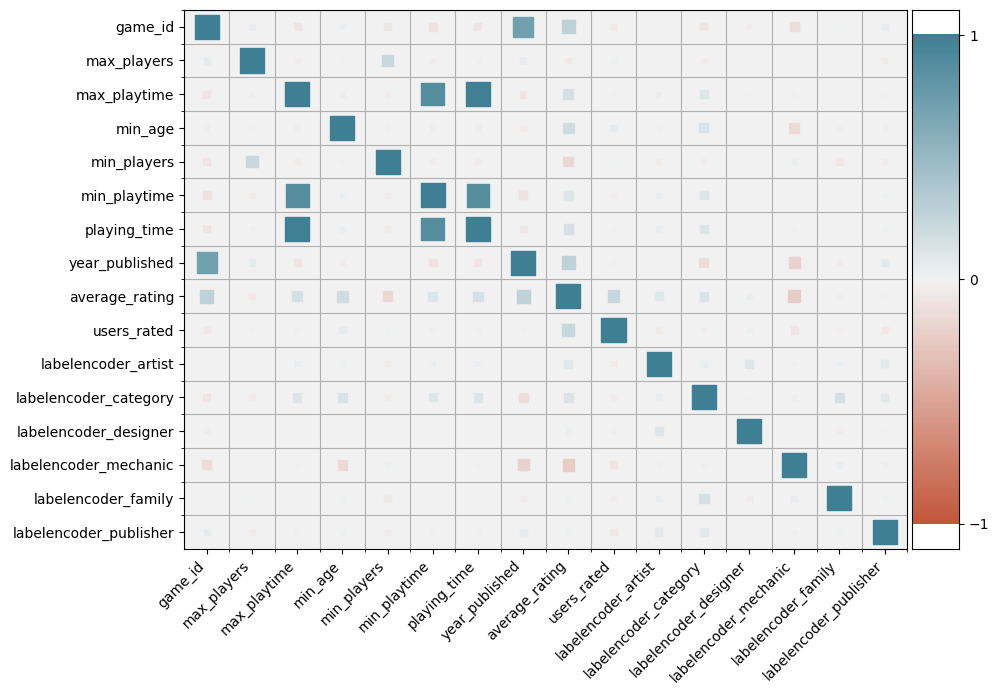

In [26]:
#heatmap to check correlation between variables:

#!pip install heatmapz

# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

plt.figure(figsize=(10, 7))
corrplot(games.corr(), size_scale=300);

In [27]:
#sns.set_palette('crest')
#sns.jointplot(x='users_rated', y='max_playtime', kind='hex', data=games);

In [28]:
#Mean by average rating of games older than 1992:

df_old = games.query('year_published<1992')
mean_old = df_old['average_rating'].mean()

In [29]:
df_new = games.query('year_published>=1992')
mean_new = df_new['average_rating'].mean()

In [30]:
labels={"0": "Old Games", "1": "New Games"}

In [31]:
data = [mean_old, mean_new]
fig = px.bar(data, text_auto=True)
fig.update_layout({'title': {'text':"Comparative of Average Rating between Old and New Games", 'x':0.5, 'font_size':20,
                            }}, 
                 showlegend = False, autosize=False, width=1000, height=500,
                  paper_bgcolor='white')
fig.update_layout(yaxis_range=[6,7])
fig.update_traces(marker_color=['mediumseagreen', 'darkgreen'])

fig.show()

<p style='text-align: justify;'>
Considering the year of 1992 to classify a game as new or old, new games are slightly better rated than old ones when calculating their mean. 
<p style='text-align: justify;'>
To create a new board game, it is important to know which are the most common mechanics used. The frequency of each unique value is checked by applying the method “value_counts()”. It sorts the values by descending order and, to select only the 3 first ones, “head(3)” will be used. 


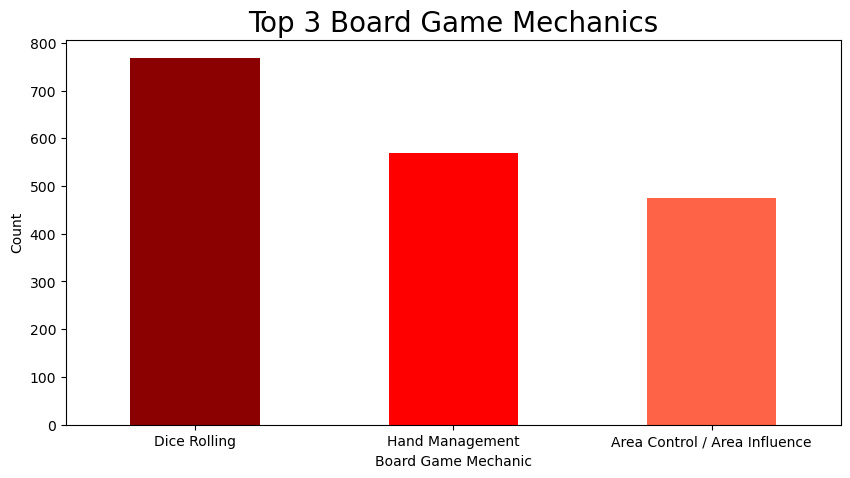

In [32]:
#mechanic frequency: the 3 most common mechanics in the games (using mechanic1):

mechanics = games.mechanic1.value_counts().head(3)

plt.figure(figsize=(10, 5))
pd.Series(mechanics).plot(kind='bar', grid=False, color=['darkred', 'red', 'tomato'])
plt.xticks(rotation=0)
plt.xlabel('Board Game Mechanic')
plt.ylabel('Count')
plt.title('Top 3 Board Game Mechanics', size=20)
plt.show()

<p style='text-align: justify;'>
The most common mechanics used on board games are “Hex-and-Counter”,  “Hand Management” and “Dice rolling, Hex-and-Counter”. On the other hand, the mechanics that have the best average rating are the following:


In [33]:
#top 3 mechanics by average rating:
#mean of each game, grouping all the observations by 'name' and calculating the 'mean' of the column 'average_rating':
top3mech = pd.DataFrame(games.groupby(['mechanic1']).average_rating.mean())

#reseting index so 'name' will be a feature:
top3mech.reset_index(inplace=True)

#sorting the dataframe by the highest average rating:
top3_mech = top3mech.sort_values('average_rating', ascending = False).head(3)

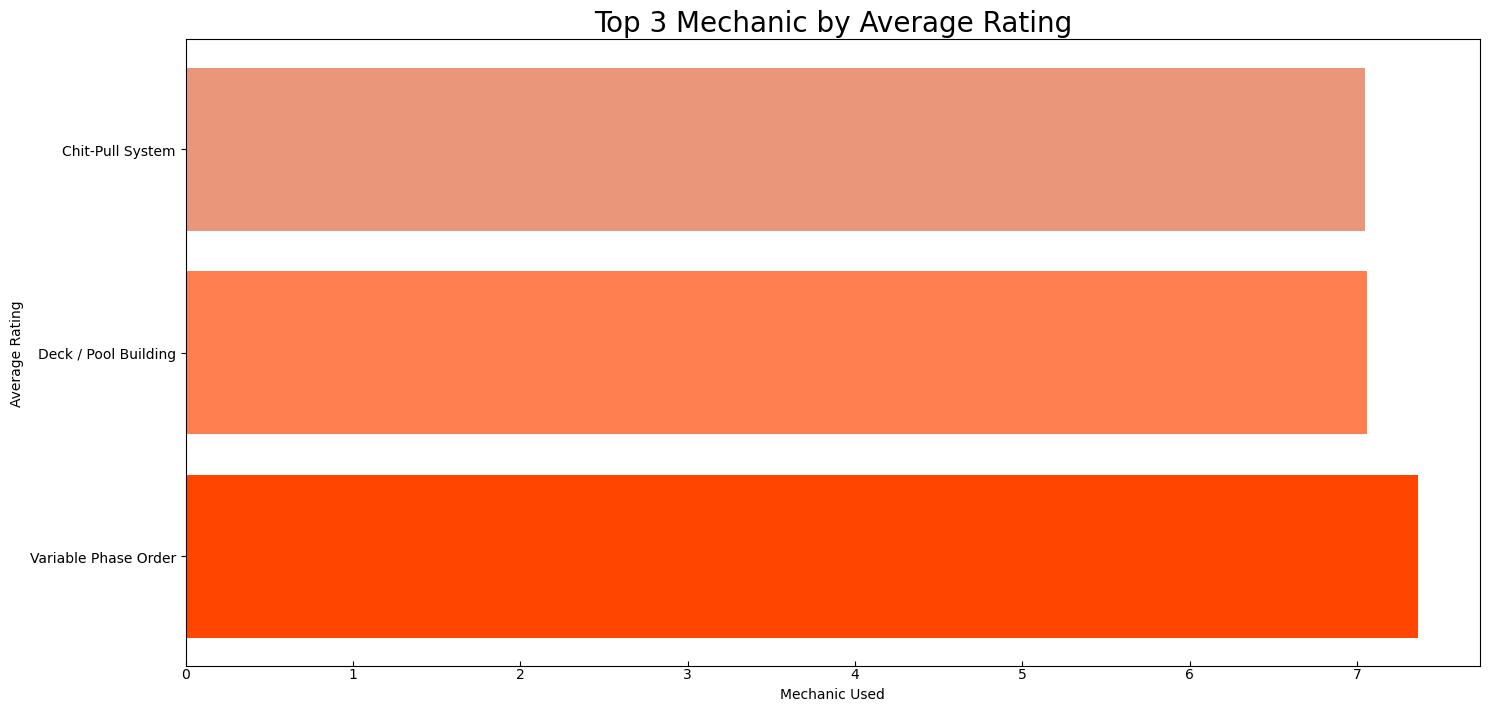

In [34]:
mechanic = top3_mech.iloc[:, 0]


plt.figure(figsize=(15,7))
plt.barh(top3_mech["mechanic1"],top3_mech["average_rating"],color=['orangered', 'coral', 'darksalmon'])
plt.xlabel("Mechanic Used")
plt.ylabel('Average Rating')
#plt.ylim(ymin=-1, ymax=3)
#plt.xlim(xmin=8, xmax=9)
plt.tight_layout() 
plt.tick_params(axis='x', which='major', direction='in', labelleft=bool, reset=False, pad=1) 
plt.title("Top 3 Mechanic by Average Rating", size=20)

plt.show();

<p style='text-align: justify;'>
Again, different shades of a same hue were used to imply ranking. 
<p style='text-align: justify;'>
The following graphs also show important data about the board games, such as the top categories by average rating and the most common ones in board games, the most rated games on this dataset, the amount of games published over the years and the designers and artists with the best rating. Bar and dot plots were used to represent amount of data and line chart to verify how it changed over the years.  


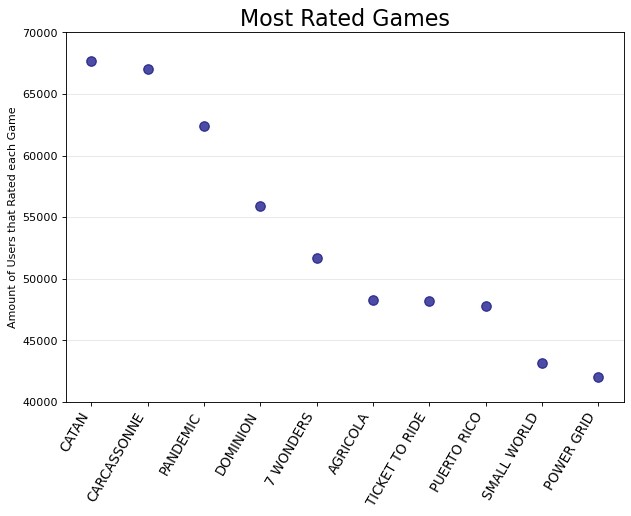

In [35]:
#most rated games:
rated_games = pd.DataFrame(games.groupby(['name']).users_rated.sum())
rated_games.reset_index(inplace=True)
rated_games.sort_values('users_rated', ascending = False, inplace=True)

rated_games1 = rated_games.head(10)

# Draw plot
fig, ax = plt.subplots(figsize=(9,6), dpi= 80)
ax.scatter(x=rated_games1["name"], y=rated_games1["users_rated"], s=75, alpha=0.7, color='navy')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Title, Label, Ticks and Ylim
ax.set_ylabel('Amount of Users that Rated each Game')
ax.set_xticks(rated_games1["name"])
ax.set_xticklabels(rated_games1["name"].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(40000, 70000)
ax.grid(axis="y",alpha=.3)
ax.set_title('Most Rated Games', fontdict={'size':20})

plt.show();

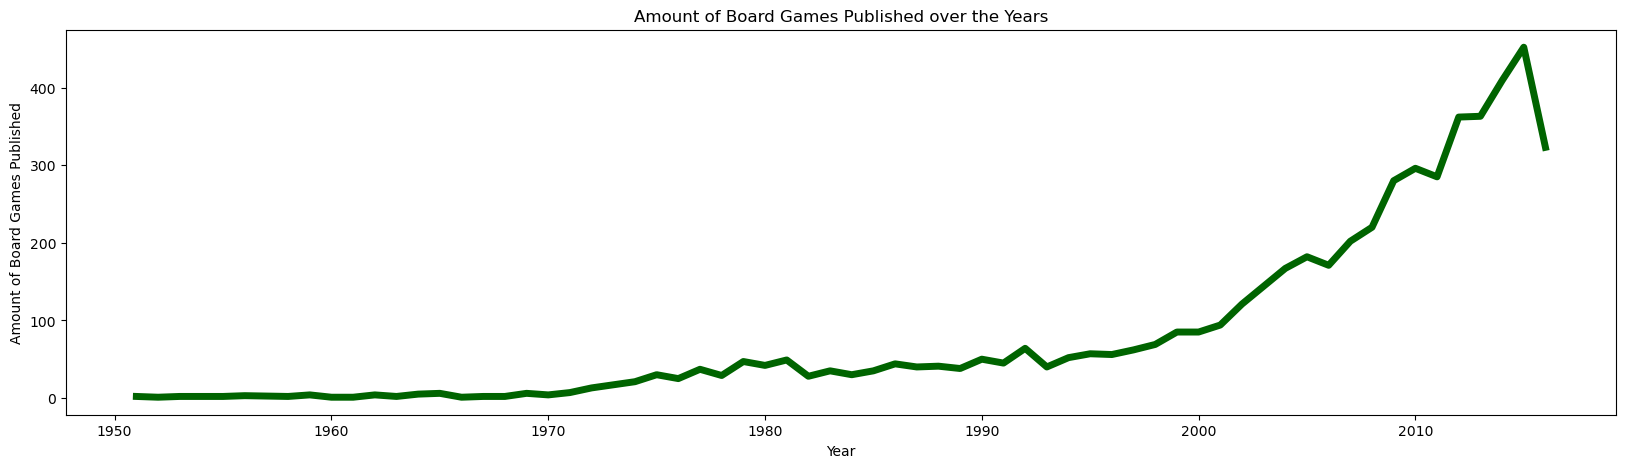

In [36]:
#amount of board games published over years:

plt.figure(figsize=(20, 5))
games['year_published'].value_counts().sort_index().plot(linewidth=5, color='darkgreen')
plt.xlabel('Year')
plt.ylabel('Amount of Board Games Published')
plt.title('Amount of Board Games Published over the Years')
plt.show()

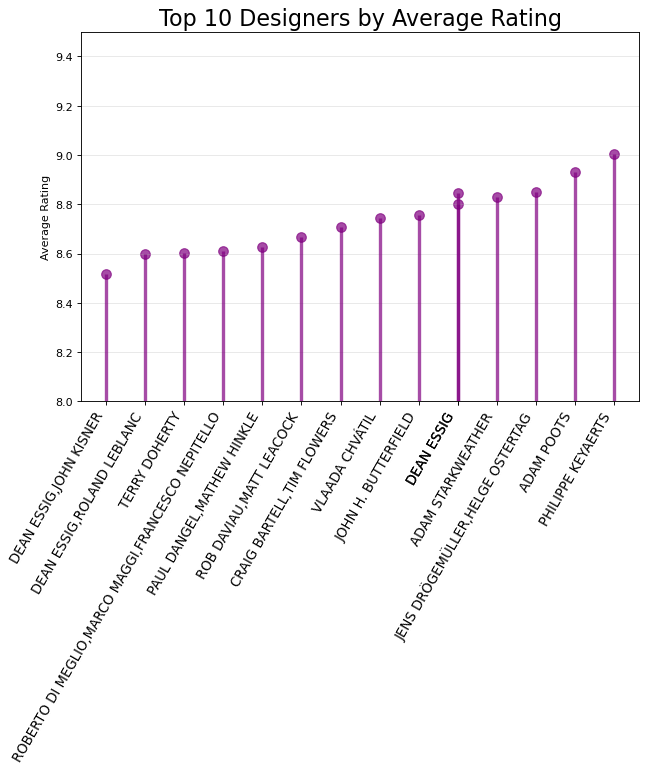

In [37]:
# Prepare data
imdb = games.sort_values(by="average_rating",ascending=False).reset_index(drop=True).iloc[0:15]
imdb.sort_values(by="average_rating",ascending=True,inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(9,6), dpi= 80)
ax.vlines(x=imdb["designer"], ymin=8, ymax=imdb["average_rating"], alpha=0.7, linewidth=3, color='purple')
ax.scatter(x=imdb["designer"], y=imdb["average_rating"], s=75, alpha=0.7, color='purple')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Title, Label, Ticks and Ylim
ax.set_ylabel('Average Rating')
ax.set_xticks(imdb["designer"])
ax.set_xticklabels(imdb["designer"].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(8, 9.5)
ax.grid(axis="y",alpha=.3)
ax.set_title('Top 10 Designers by Average Rating', fontdict={'size':20})

plt.show();

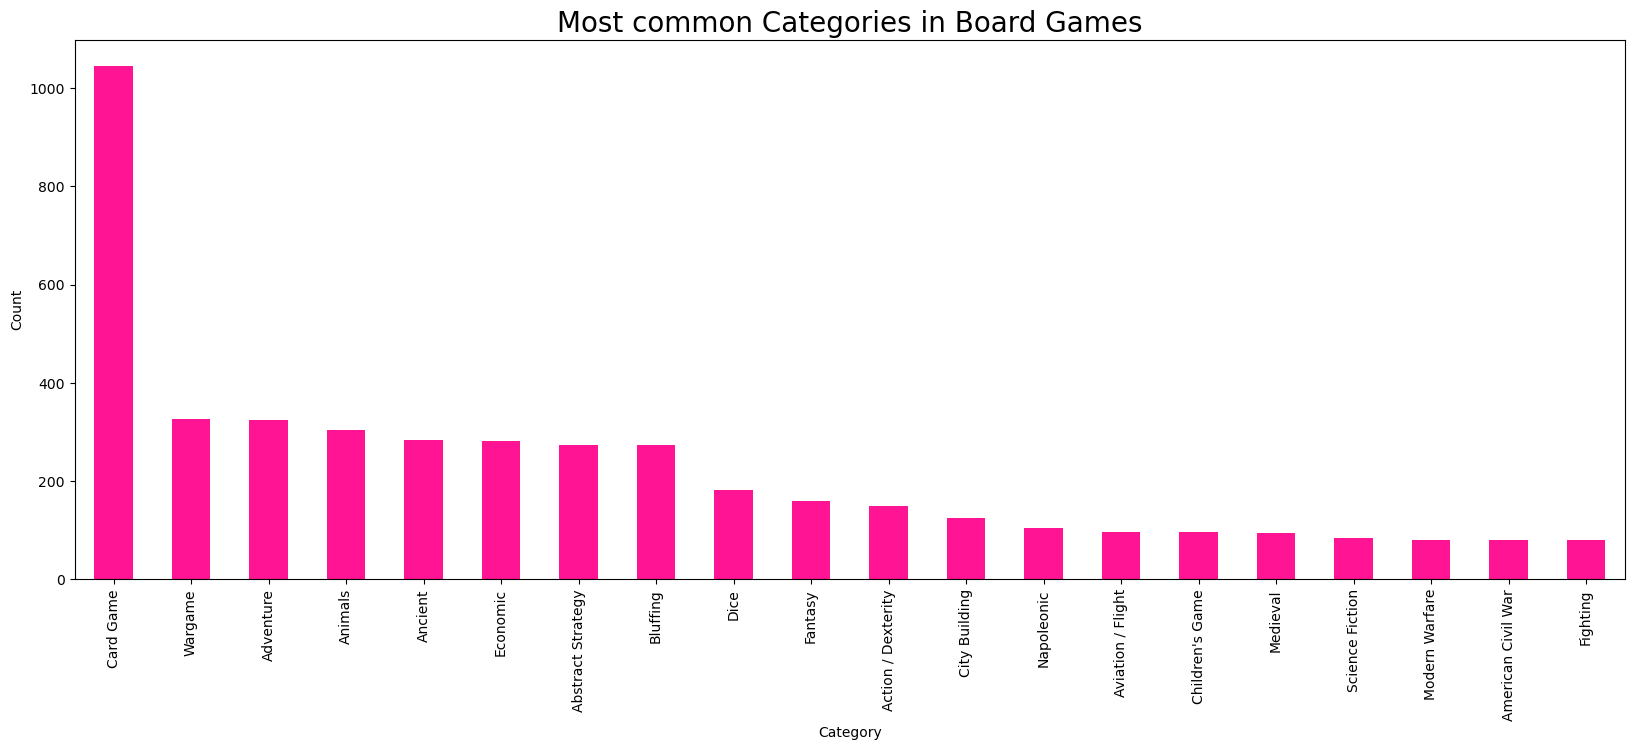

In [38]:
# how many games there are in each category:

plt.figure(figsize=(20, 7))
qnt_games_cat=games['category1']
pd.Series(qnt_games_cat).value_counts()[:20].plot(kind='bar', color='deeppink')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Most common Categories in Board Games', fontsize=20)
plt.show()

<p style='text-align: justify;'>
This analysis gave a lot of statistical insights about board games, however it is still unknown what makes real difference on the average rating, the main question that leads this project. Therefore, the next step is to check the importance of each feature for the dataset.

#### 3. Feature Importance
<p style='text-align: justify;'>
Harrison (2019) presents Principal Component Analysis (PCA) as an alternative for feature selection, as it results in the features with the highest variance for the data, which means that disregarding these may cause poor predictions or higher errors. Singh (2022) shows a practical example of the use of PCA for feature selection when applying clustering with K-Means algorithm to identify similar wines from the wine dataset. She followed the steps listed next: 1) scaling the data, 2) reducing dimensions with Principal Component Analysis (PCA), 3) finding the features in PCA that keep the expected amount of variance of data, 4) hyperparameter tuning and finally 5) applying K-Means. 
<p style='text-align: justify;'>
Based on it, it has been decided to use PCA in order to find the variables that keep 90% of the variance of the data. It is known that PCA works better with scaled data as all the features are in a comparable range. On this case, it was decided to use Mininum Maximun Scaler, as they do not mask the presence of outliers, which will be applied on the “numericalCols” dataframe. 


In [39]:
numericalCols.drop(columns=['game_id'], inplace=True)

In [40]:
#numericalCols dataframe will be used;

#scaling the data with MinMaxScaler as we dont know if outliers matter:

from sklearn.preprocessing import MinMaxScaler
df_scaled = MinMaxScaler().fit_transform(numericalCols)
df_scaled = pd.DataFrame(df_scaled, columns = ['max_players', 'max_playtime', 'min_age', 'min_players', 'min_playtime', 'playing_time', 'year_published', 'average_rating', 'users_rated', 'artistcode', 'CategoryCode', 'designercode', 'mechanicCode', 'familyCode', 'publisherCode'])

df_scaled.describe()

max_players  max_playtime      min_age  min_players  min_playtime  \
count  5396.000000   5396.000000  5396.000000  5396.000000   5396.000000   
mean      0.038871      0.005665     0.479376     0.126716      0.004889   
std       0.058069      0.018718     0.156885     0.082516      0.016555   
min       0.000000      0.000000     0.000000     0.000000      0.000000   
25%       0.020408      0.001678     0.380952     0.125000      0.001678   
50%       0.030612      0.003415     0.476190     0.125000      0.002546   
75%       0.051020      0.005554     0.571429     0.125000      0.005151   
max       1.000000      1.000000     1.000000     1.000000      1.000000   

       playing_time  year_published  average_rating  users_rated   artistcode  \
count   5396.000000     5396.000000     5396.000000  5396.000000  5396.000000   
mean       0.005611        0.827077        0.643845     0.019540     0.499161   
std        0.018734        0.175608        0.114795     0.057148     0.288242   
min        0.000000        0.000000        0.000000     0.000000     0.000000   
25%        0.001736        0.769231        0.568153     0.000873     0.254189   
50%        0.003472        0.892308        0.645984     0.003269     0.503086   
75%        0.005208        0.953846        0.720980     0.013372     0.752792   
max        1.000000        1.000000        1.000000     1.000000     1.000000   

       CategoryCode  designercode  mechanicCode   familyCode  publisherCode  
count   5396.000000   5396.000000   5396.000000  5396.000000    5396.000000  
mean       0.563880      0.513815      0.620444     0.540635       0.556464  
std        0.311295      0.290653      0.281745     0.295486       0.289353  
min        0.000000      0.000000      0.000000     0.000000       0.000000  
25%        0.287069      0.264108      0.402455     0.285436       0.303680  
50%        0.573924      0.530414      0.695309     0.592693       0.597878  
75%        0.862910      0.779040      0.867602     0.793048       0.815574  
max        1.000000      1.000000      1.000000     1.000000       1.000000

<p style='text-align: justify;'>
As result of the scaling method, the descriptive statistics show that the minimum value for all features is zero and the maximum 1. It was also checked resources on scaling encoded data and found that when it was done via label encoder there is no problem.

In [41]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5396 entries, 0 to 5395
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   max_players     5396 non-null   float64
 1   max_playtime    5396 non-null   float64
 2   min_age         5396 non-null   float64
 3   min_players     5396 non-null   float64
 4   min_playtime    5396 non-null   float64
 5   playing_time    5396 non-null   float64
 6   year_published  5396 non-null   float64
 7   average_rating  5396 non-null   float64
 8   users_rated     5396 non-null   float64
 9   artistcode      5396 non-null   float64
 10  CategoryCode    5396 non-null   float64
 11  designercode    5396 non-null   float64
 12  mechanicCode    5396 non-null   float64
 13  familyCode      5396 non-null   float64
 14  publisherCode   5396 non-null   float64
dtypes: float64(15)
memory usage: 632.5 KB


In [42]:
#applying PCA to reduce the dimensions of the data and keep 90% of the variance:

from sklearn.decomposition import PCA

pca = PCA(0.90).fit(df_scaled)
pca.n_components_

7

In [43]:
pca_2 = PCA(n_components=7)
pca_2_result = pca_2.fit_transform(df_scaled)

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 91.98%


In [44]:
print(pca_2.explained_variance_ratio_)

[0.18770221 0.15741928 0.1448733  0.13489654 0.12737814 0.11845981
 0.04905906]


In [45]:
# Results from pca.components_

dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_scaled.columns, index=['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7'])
dataset_pca

max_players  max_playtime   min_age  min_players  min_playtime  \
PC_1     0.007001      0.006105  0.076149     0.019818      0.004880   
PC_2     0.002499      0.000411  0.022583     0.003799      0.000817   
PC_3     0.004457      0.001846  0.080159     0.004868      0.000485   
PC_4     0.001969      0.002126  0.084337     0.002642      0.001449   
PC_5     0.007477      0.002784  0.016533     0.016304      0.003184   
PC_6     0.001116      0.003149  0.000969     0.000536      0.002393   
PC_7     0.019455      0.003594  0.184678     0.004132      0.005310   

      playing_time  year_published  average_rating  users_rated  artistcode  \
PC_1      0.005968        0.053612        0.050505     0.008119    0.250219   
PC_2      0.000414        0.085778        0.054343     0.003763    0.599904   
PC_3      0.001884        0.143668        0.072236     0.008015    0.167152   
PC_4      0.002151        0.004260        0.067198     0.019905    0.218315   
PC_5      0.002755        0.135128        0.053118     0.007609    0.295643   
PC_6      0.003179        0.076914        0.005826     0.005878    0.642468   
PC_7      0.003936        0.926424        0.227809     0.008106    0.011845   

      CategoryCode  designercode  mechanicCode  familyCode  publisherCode  
PC_1      0.763818      0.006451      0.034018    0.493218       0.312542  
PC_2      0.129742      0.633847      0.228644    0.295956       0.266072  
PC_3      0.090222      0.436410      0.654520    0.366372       0.422424  
PC_4      0.370995      0.337548      0.479047    0.095119       0.670943  
PC_5      0.447683      0.181894      0.459282    0.640618       0.189733  
PC_6      0.176392      0.510279      0.114684    0.339096       0.401976  
PC_7      0.114908      0.009861      0.192530    0.009166       0.068003

In [46]:
dataset_pca.reset_index(inplace=True)


<p style='text-align: justify;'>
The PCA analysis returns 7 components when retaining 90% of the variance and the grouped bar chart below presents the most important features on this dataset with a threshold of 25%, which is represented by the red line. This means that all features above this line retain the expected amount of variance. Unfortunately, it was not found any palette that would have a high range of colours that are also colour-blind friendly, so that the “Paired” palette was chosen as it repeated the colours only three times.  

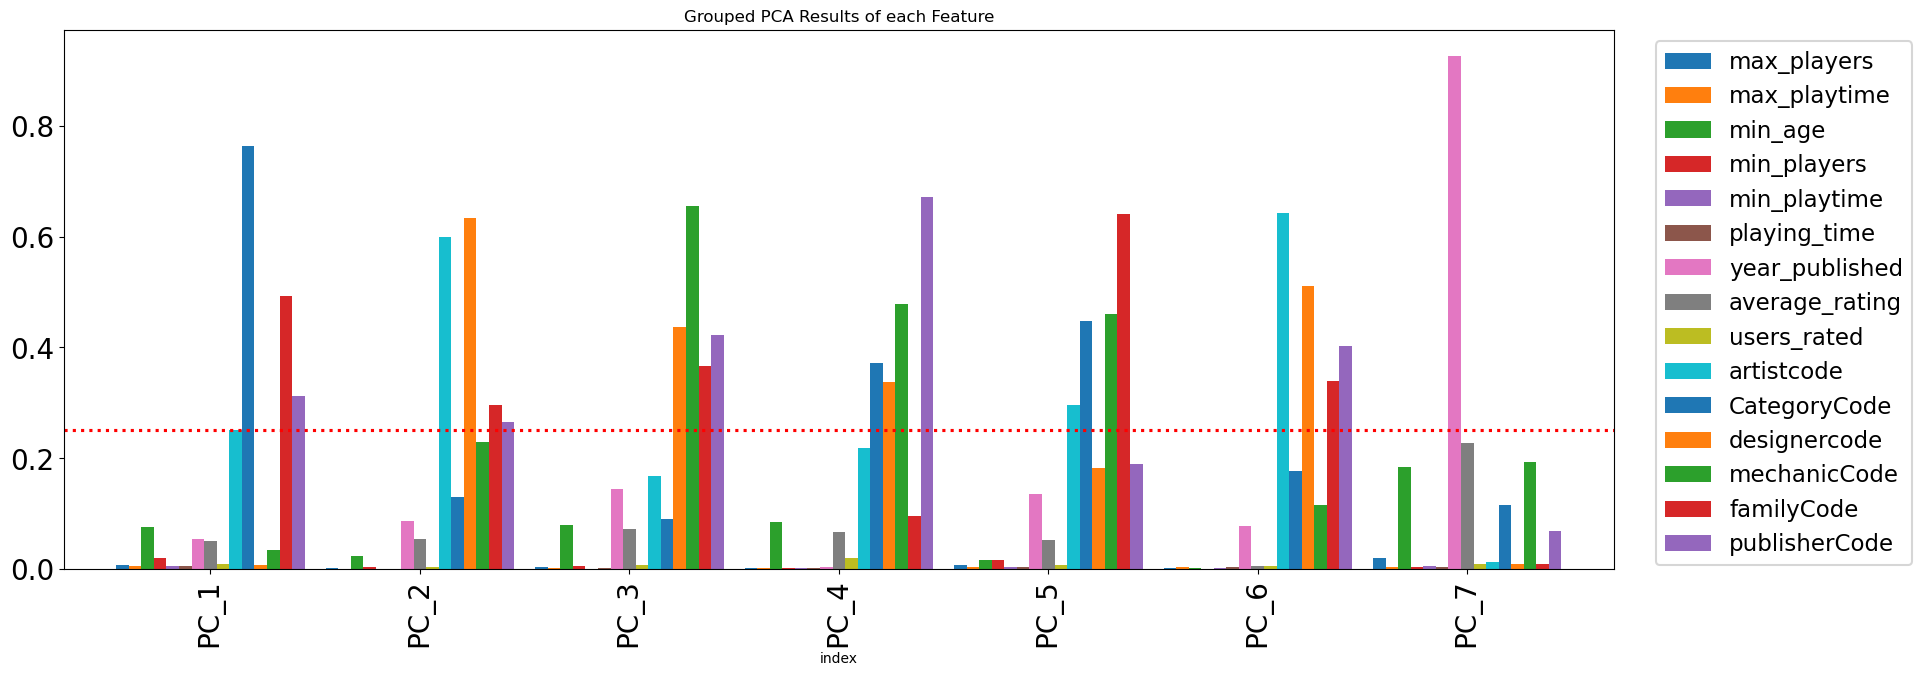

In [47]:
#Plotting PCA results using threshold of 0.25:

dataset_pca.plot(x='index',
        kind='bar',
        stacked=False,
        figsize=(20,7),
        width = 0.9,
        title='Grouped PCA Results of each Feature', fontsize=20)
sns.set_palette('Paired')
sns.set_context('talk')
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1))
threshold = 0.25
plt.axhline(threshold, color='red', ls='dotted')

plt.show();

<p style='text-align: justify;'>
Besides the feature “year published”, all the other ones repeat in more than one PC, and all of them together sum up to 7 features. This means that the most important features for this analysis are: category, family, artist, designer, mechanic, year published and publisher. 
<p style='text-align: justify;'>
Considering that this report is for a company that wants to publish new board games, the category, family and mechanic are the most important features, because new games are usually well rated and the publisher would be an opponent. In addition, the company could hire artists and designers that have the best ratings of the market. So the analysis will focus on the three categories that matter.
<p style='text-align: justify;'>
When plotting the categories previously, it was verified that many of them had the same words describing different categories. But are they actually similar?


#### 4. Word Embedding and K-Means
<p style='text-align: justify;'>
It is known that clustering is the method used to identify similarities between data points. This unsupervised machine learning method will be used in order to join similar observations in new categories. However, clustering works only for numerical data and, in this case, it’s wanted to process text. So that word embedding process, which is a way to represent similar words in a similar way (Brownlee, 2017), will be followed and will be applied on Category to identify possible similarities. 
<p style='text-align: justify;'>
The library “genism” will be used in order to process the words, which means tokenize and remove stop words. It was chosen on top of NLTK for being simpler to apply. Then, from the same library, Word2Vec will be applied to learn and embed words, creating distance vectors, so then words that are similar between each other will have a higher score. After identifying the similarities, the vectors will be recorded in a new category that will be the result from clustering method K-Means (Rong, 2014; Brownlee, 2017; Ganesan, 2018; (Haider et al., 2020).  


In [48]:
#using word2Vec to categorize similar observations from feature "category"

#!pip install gensim
#!pip install python-Levenshtein


import gensim

#example:
games.category1[2]

'Abstract Strategy'

In [49]:
#gensim has its own method to preprocessing (tokenize and remove stop-words) the sentences:
#example:

gensim.utils.simple_preprocess('Abstract Strategy,Medieval')

['abstract', 'strategy', 'medieval']

In [50]:
#apply tokenizer to the columns:

cat_token = games.category1.apply(gensim.utils.simple_preprocess)

In [51]:
#calling the model:

model = gensim.models.Word2Vec(
    window=2,
    min_count=2
)

In [52]:
#building vocabulary:

model.build_vocab(cat_token, progress_per=100)

In [53]:
#training the model:

model.train(cat_token, total_examples = model.corpus_count, epochs=model.epochs)

(12002, 40235)

In [54]:
model.save('./word2vec_category_board_games.model')

In [55]:
model.wv.most_similar('animals')

[('horror', 0.1957002431154251),
 ('nautical', 0.17530226707458496),
 ('wargame', 0.17018885910511017),
 ('racing', 0.14516258239746094),
 ('prehistoric', 0.1428055316209793),
 ('ancient', 0.13887980580329895),
 ('wars', 0.1225372850894928),
 ('humor', 0.1062556579709053),
 ('transportation', 0.10198558866977692),
 ('environmental', 0.0955495685338974)]

In [56]:
cat_token

0                  [economic]
1                [card, game]
2        [abstract, strategy]
4                  [economic]
5              [civilization]
                 ...         
10515            [card, game]
10516            [card, game]
10524               [fantasy]
10527          [vietnam, war]
10531            [card, game]
Name: category1, Length: 5396, dtype: object

In [57]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(cat_token, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(5396, 100)

In [58]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [59]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=3,
    mb=100,
    print_silhouette_values=True,
)

df_clusters = pd.DataFrame({
    "text": cat_token,
    "tokens": [" ".join(text) for text in cat_token],
    "cluster": cluster_labels
})

For n_clusters = 3
Silhouette coefficient: 0.32
Inertia:16.328222994688318
Silhouette values:
    Cluster 0: Size:373 | Avg:0.51 | Min:0.00 | Max: 0.67
    Cluster 2: Size:2137 | Avg:0.40 | Min:0.13 | Max: 0.46
    Cluster 1: Size:2886 | Avg:0.23 | Min:0.00 | Max: 0.29


<p style='text-align: justify;'>
K-Means was chosen as it uses the Euclidean distance to calculate the clusters, which works well for distance vectors. The amount of clusters was defined by attempting and error until finding the best silhouette score, which was 3 clusters with a score of 0.49. The closer to 1 the silhouette score, the better the amount of clusters. 
<p style='text-align: justify;'>
The result above shows that the best cluster is the number 1, which its score is 0.54, and the bubble chart below represent the sizes of each cluster. These results mean that there are similar categories in the dataset that can be reduced to only 3, and with this information it is now possible to verify which one is better rated.


In [60]:
cluster_size = pd.DataFrame(df_clusters['cluster'].value_counts())
cluster_size.reset_index(inplace=True)

In [61]:
cluster_size.rename(columns={'index':'cluster_id', 'cluster':'cluster_size'}, inplace=True)

In [62]:
cluster_size

cluster_id  cluster_size
0           1          2886
1           2          2137
2           0           373

In [63]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=cluster_size['cluster_id'], y=cluster_size['cluster_size'],
    mode='markers',
    marker=dict(
        size=[100, 50, 20],
    )
)])
fig.update_layout(
    title = 'Size of Category Clusters',
)
fig.show()

<p style='text-align: justify;'>
To achieve it, these clusters will be merged with the original dataset through index. 

In [64]:
#dataframe with index and clusters, to merge with original one:

cat_clusters = pd.DataFrame({
    "text": cat_token,
    "tokens": [" ".join(text) for text in cat_token],
    "cluster": cluster_labels
})

In [65]:
cat_clusters.rename(columns={'tokens': 'tokens_cat', 'cluster':'category_cluster'}, inplace=True)
cat_clusters.drop(columns=['text'], inplace=True)

In [66]:
cat_clusters.reset_index(inplace=True)
cat_clusters

index         tokens_cat  category_cluster
0         0           economic                 1
1         1          card game                 2
2         2  abstract strategy                 2
3         4           economic                 1
4         5       civilization                 1
...     ...                ...               ...
5391  10515          card game                 2
5392  10516          card game                 2
5393  10524            fantasy                 1
5394  10527        vietnam war                 0
5395  10531          card game                 2

[5396 rows x 3 columns]

In [67]:
df.reset_index(inplace=True)

In [68]:
new_df = pd.merge(df, cat_clusters, on="index")
new_df.head()

index  game_id  max_players  max_playtime  min_age  min_players  \
0      0        1          5.0         240.0       14          3.0   
1      1        2          4.0          30.0       12          3.0   
2      2        3          4.0          60.0       10          2.0   
3      4        5          6.0          90.0       12          3.0   
4      5        6          6.0         240.0       12          2.0   

   min_playtime                name  playing_time  year_published  ...  \
0         240.0          Die Macher           240            1986  ...   
1          30.0        Dragonmaster            30            1981  ...   
2          30.0             Samurai            60            1998  ...   
3          90.0             Acquire            90            1964  ...   
4         240.0  Mare Mediterraneum           240            1989  ...   

  average_rating users_rated labelencoder_artist labelencoder_category  \
0        7.66508        4498                2071                  1861   
1        6.60815         478                 381                  1241   
2        7.44119       12019                1102                    84   
3        7.35830       15195                2905                  1801   
4        6.52534          73                1481                  1613   

  labelencoder_designer labelencoder_mechanic  labelencoder_family  \
0                  1463                   510                 1751   
1                   913                  2276                  761   
2                  2126                   664                 1004   
3                  2369                  1962                   82   
4                  1210                  1557                 1470   

   labelencoder_publisher         tokens_cat  category_cluster  
0                    2085           economic                 1  
1                    1527          card game                 2  
2                     225  abstract strategy                 2  
3                     190           economic                 1  
4                    2131       civilization                 1  

[5 rows x 26 columns]

In [69]:
new_df.drop(columns=['index','game_id','category'], inplace=True)
new_df.head()

max_players  max_playtime  min_age  min_players  min_playtime  \
0          5.0         240.0       14          3.0         240.0   
1          4.0          30.0       12          3.0          30.0   
2          4.0          60.0       10          2.0          30.0   
3          6.0          90.0       12          3.0          90.0   
4          6.0         240.0       12          2.0         240.0   

                 name  playing_time  year_published  \
0          Die Macher           240            1986   
1        Dragonmaster            30            1981   
2             Samurai            60            1998   
3             Acquire            90            1964   
4  Mare Mediterraneum           240            1989   

                        artist               designer  ... average_rating  \
0          Marcus Gschwendtner     Karl-Heinz Schmiel  ...        7.66508   
1                   Bob Pepper  G. W. "Jerry" D'Arcey  ...        6.60815   
2              Franz Vohwinkel          Reiner Knizia  ...        7.44119   
3  Scott Okumura,Peter Whitley            Sid Sackson  ...        7.35830   
4                 Jean du Poël           Jean du Poël  ...        6.52534   

  users_rated labelencoder_artist  labelencoder_category  \
0        4498                2071                   1861   
1         478                 381                   1241   
2       12019                1102                     84   
3       15195                2905                   1801   
4          73                1481                   1613   

   labelencoder_designer  labelencoder_mechanic  labelencoder_family  \
0                   1463                    510                 1751   
1                    913                   2276                  761   
2                   2126                    664                 1004   
3                   2369                   1962                   82   
4                   1210                   1557                 1470   

   labelencoder_publisher         tokens_cat  category_cluster  
0                    2085           economic                 1  
1                    1527          card game                 2  
2                     225  abstract strategy                 2  
3                     190           economic                 1  
4                    2131       civilization                 1  

[5 rows x 23 columns]

In [70]:
top_cat = pd.DataFrame(new_df.groupby(['category_cluster']).average_rating.mean())
top_cat.sort_values('average_rating', ascending = False)

average_rating
category_cluster                
0                       6.846386
1                       6.698542
2                       6.500471

In [71]:
new_df.query('category_cluster==0').head()

max_players  max_playtime  min_age  min_players  min_playtime  \
14           2.0           5.0       10          2.0           5.0   
46           2.0         240.0       12          2.0         240.0   
47           2.0         180.0       12          2.0         180.0   
114          5.0         360.0       12          2.0         240.0   
122          2.0          60.0       12          2.0          60.0   

                        name  playing_time  year_published  \
14                Button Men             5            1999   
46                 Bobby Lee           240            1993   
47                 Sam Grant           180            1997   
114                    Ikusa           360            1986   
122  Wooden Ships & Iron Men            60            1974   

                                                artist  \
14   Pete Abrams,Gerald Brom,Larry Elmore,Phil Fogl...   
46                                           Eric Hotz   
47                                           Eric Hotz   
114                                       Steve Argyle   
122                                       Edward Moran   

                       designer  ... average_rating users_rated  \
14                 James Ernest  ...        6.30870         724   
46                Tom Dalgliesh  ...        6.83287         297   
47   Tom Dalgliesh,Gary Selkirk  ...        6.43277         119   
114                Michael Gray  ...        7.00973        4283   
122             S. Craig Taylor  ...        6.99472        1694   

    labelencoder_artist  labelencoder_category  labelencoder_designer  \
14                 2551                   1626                   1138   
46                 1033                    460                   2543   
47                 1033                    460                   2546   
114                2999                   1575                   1828   
122                 992                    429                   2295   

     labelencoder_mechanic  labelencoder_family  labelencoder_publisher  \
14                    1726                 2904                      71   
46                    1747                 1134                    1243   
47                    2226                 1117                    1243   
114                    971                 1000                     907   
122                     73                  456                     912   

                 tokens_cat  category_cluster  
14   collectible components                 0  
46       american civil war                 0  
47       american civil war                 0  
114               civil war                 0  
122           age of reason                 0  

[5 rows x 23 columns]

<p style='text-align: justify;'>
Now, we can verify that the cluster with the better average rating is the number 0. When filtering the observations from cluster 0, we can verify that all the games are related to war.
<p style='text-align: justify;'>    
Now it is known that war games are the ones with best rating, so the best rated families, mechanics, artists and designers of this cluster will be plotted as well. It is expected that the results of family plotting are related to war subjects and the plot below confirms it.

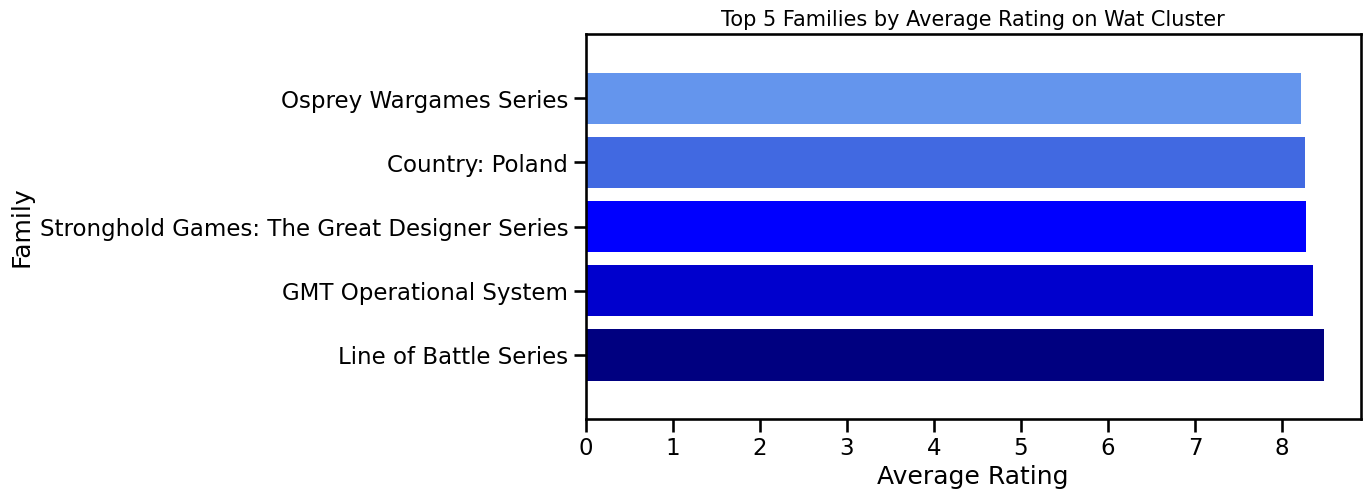

In [72]:
#mean of each game, grouping all the observations by 'name' and calculating the 'mean' of the column 'average_rating':
df1 = new_df.query('category_cluster==0')
df2 = pd.DataFrame(df1.groupby(['family']).average_rating.mean())

#reseting index so 'name' will be a feature:
df2.reset_index(inplace=True)

#sorting the dataframe by the highest average rating, using 'head' to select the first 5:
top_fam = df2.sort_values('average_rating', ascending = False).head()

#plotting the 5 top games in a bar chart, with analogous colours to create harmony:
plt.figure(figsize=(10,5))
plt.locator_params('y',nbins = 16)
plt.ylim(ymin=-1, ymax=5)
plt.barh(top_fam["family"],top_fam["average_rating"], color=['navy', 'mediumblue', 'blue', 'royalblue', 'cornflowerblue'])
plt.xlabel("Average Rating")
plt.ylabel("Family")
plt.title("Top 5 Families by Average Rating on Wat Cluster", size=15)
sns.set_context('notebook')
plt.show()

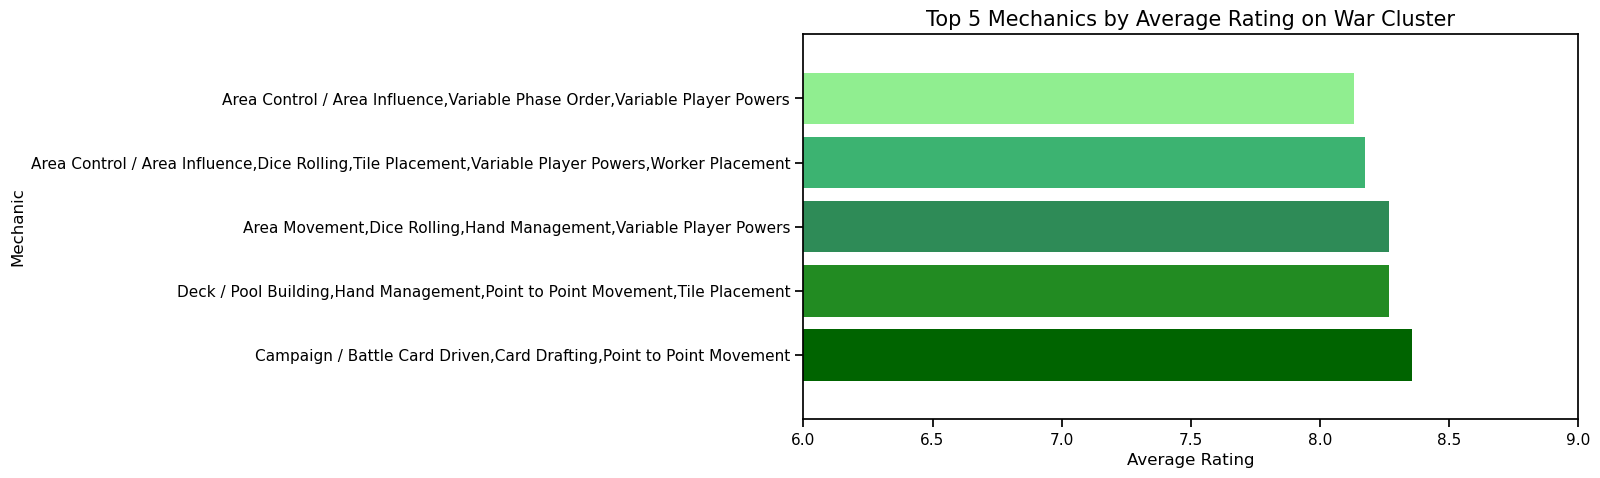

In [73]:
#mean of each game, grouping all the observations by 'name' and calculating the 'mean' of the column 'average_rating':
df3 = pd.DataFrame(df1.groupby(['mechanic']).average_rating.mean())

#reseting index so 'name' will be a feature:
df3.reset_index(inplace=True)

#sorting the dataframe by the highest average rating, using 'head' to select the first 5:
top_mec = df3.sort_values('average_rating', ascending = False).head()

#plotting the 5 top games in a bar chart, with analogous colours to create harmony:
plt.figure(figsize=(10,5))
plt.locator_params('y',nbins = 16)
plt.ylim(ymin=-1, ymax=5)
plt.xlim(xmin=6, xmax=9)
plt.barh(top_mec["mechanic"],top_mec["average_rating"], color=['darkgreen', 'forestgreen', 'seagreen', 'mediumseagreen', 'lightgreen'])
plt.xlabel("Average Rating")
plt.ylabel("Mechanic")
plt.title("Top 5 Mechanics by Average Rating on War Cluster", size=15)
plt.show()

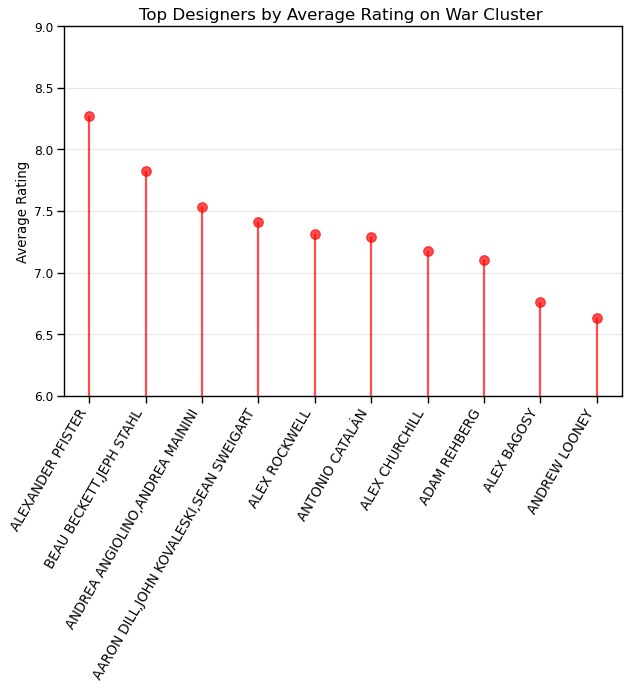

In [74]:
#mean of each game, grouping all the observations by 'name' and calculating the 'mean' of the column 'average_rating':
df5 = pd.DataFrame(df1.groupby(['designer']).average_rating.mean()).iloc[0:15]

#reseting index so 'name' will be a feature:
df5.reset_index(inplace=True)

#sorting the dataframe by the highest average rating, using 'head' to select the first 5:
top_des = df5.sort_values('average_rating', ascending = False).head(10)

# Draw plot
fig, ax = plt.subplots(figsize=(9,6), dpi= 80)
ax.vlines(x=top_des["designer"], ymin=0, ymax=top_des["average_rating"], alpha=0.7, linewidth=2, color='red')
ax.scatter(x=top_des["designer"], y=top_des["average_rating"], s=75, alpha=0.7, color='red')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Title, Label, Ticks and Ylim
ax.set_ylabel('Average Rating')
ax.set_xticks(top_des["designer"])
ax.set_xticklabels(top_des["designer"].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(6, 9)
ax.grid(axis="y",alpha=.3)
ax.set_title('Top Designers by Average Rating on War Cluster ', fontdict={'size':15})
sns.set_context('notebook')

plt.show();

<p style='text-align: justify;'>
Additionally, the mechanics applied are related to area control and campaign. The designers that are better rated on this area are also listed here as further information for the company.

#### 6. Conclusions
<p style='text-align: justify;'>
This board games dataset seems to be simple to analyse but a lot of research was required in order to find answers for the questions asked in the beginning. This report was built thinking on questions that would be important for a company that wants to publish new board games, in which its goal would be having an high average rating.
<p style='text-align: justify;'>
It was verified that the game with the highest average rating is Small World – Design Edition, that there is no linear correlation between the variables “users_rated” and “max_playtime”, that newer games are better related to old ones, that the most common mechanics used are Hex-and-Counter, Hand Management and Dice Rolling. Additionally, was found that on this scenario there are 7 features with influence on the average rating: category, year published, artist, designer, family, mechanic and publisher, but not all of them the company would have control of. Different visualizations and techniques were used to achieve these results. 
<p style='text-align: justify;'>
Considering the features that the company could use on its favour, it is possible to conclude that board games with category related to war, using mechanics of area control and campaign would be a good approach to receive better reviews from users and possibly increase its sales. In case the company wants to attract customers through famous designers, this report also provides the best rated ones on the war games market, so they could possibly hire one of them. 
<p style='text-align: justify;'>
It was decided to maintain a section about the attempts done on this project, as the failure on them led to the final answer. Other drawback found on this project was to use colour-blind friendly palette, as some of the charts needed several colours to identify different categories. 
<p style='text-align: justify;'>
Although all the difficulties, the main question of the project was answered and it was concluded that what really makes difference on the average rating of a game is its category and mechanic used and that board games related to war tend to be well rated.



#### 7. References
<p style='text-align: justify;'>
Attia, P. (2018). The Full History of Board Games. [online] Medium. Available at: https://medium.com/@peterattia/the-full-history-of-board-games-5e622811ce89 [Accessed 25 Oct. 2022].
<p style='text-align: justify;'>
Brownlee, J. (2017). What Are Word Embeddings for Text? [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/what-are-word-embeddings/#:~:text=A%20word%20embedding%20is%20a [Accessed 1 Nov. 2022].
<p style='text-align: justify;'>
Cravit, R. (2019). How to Use Color Blind Friendly Palettes to Make Your Charts Accessible - Venngage. [online] Venngage. Available at: https://venngage.com/blog/color-blind-friendly-palette/ [Accessed 1 Nov. 2022].
<p style='text-align: justify;'>
Donovan, T. (2019). It’s all a game : a short history of board games. London, England: Atlantic.
Ferreira, C. (2020). Two Simple Steps to Create Colorblind Friendly Data Visualizations. [online] Medium. Available at: https://towardsdatascience.com/two-simple-steps-to-create-colorblind-friendly-data-visualizations-2ed781a167ec [Accessed 1 Nov. 2022].
<p style='text-align: justify;'>
Ganesan, K. (2018). Gensim Word2Vec Tutorial: An End-to-End Example. [online] Kavita Ganesan, PhD. Available at: https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.Y18D_HbP1PY [Accessed 1 Nov. 2022].
<p style='text-align: justify;'>
Haider, M.M., Hossin, Md.A., Mahi, H.R. and Arif, H. (2020). Automatic Text Summarization Using Gensim Word2Vec and K-Means Clustering Algorithm. 2020 IEEE Region 10 Symposium (TENSYMP). doi:10.1109/tensymp50017.2020.9230670.
<p style='text-align: justify;'>
Harrison, M. (2019). Machine learning pocket reference : working with structured data in Python. North Sebastopol, Ca: O’reilly Media, Inc.
<p style='text-align: justify;'>
Nakao, M. (2019). Special series on ‘effects of board games on health education and promotion’ board games as a promising tool for health promotion: a review of recent literature. BioPsychoSocial Medicine, 13(1). doi:10.1186/s13030-019-0146-3.
<p style='text-align: justify;'>
Ramani, G.B. and Siegler, R.S. (2008). Promoting Broad and Stable Improvements in Low-Income Children’s Numerical Knowledge Through Playing Number Board Games. Child Development, 79(2), pp.375–394. doi:10.1111/j.1467-8624.2007.01131.x.
<p style='text-align: justify;'>
Rong, X. (2014). word2vec Parameter Learning Explained. [online] arXiv.org. Available at: https://arxiv.org/abs/1411.2738 [Accessed 1 Nov. 2022].
<p style='text-align: justify;'>
Shelar, A. and Huang, C.-Y. (2018). Sentiment Analysis of Twitter Data. 2018 International Conference on Computational Science and Computational Intelligence (CSCI). doi:10.1109/csci46756.2018.00252.
<p style='text-align: justify;'>
singh (2022). K Means Clustering on High Dimensional Data. [online] The Startup. Available at: https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240 [Accessed 27 Oct. 2022].
<p style='text-align: justify;'>
Wang, Y. and Ni, X.S. (2019). A XGBoost risk model via feature selection and Bayesian hyper-parameter optimization. arXiv:1901.08433 [cs, stat]. [online] Available at: https://arxiv.org/abs/1901.08433 [Accessed 1 Nov. 2022].
